## Importing the Libraries

In [31]:
import tweepy
import re
import pickle
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
import numpy as np
# Initializing the keys
consumer_key = '78JdSjAYvkaTkU9wwylPUtXG'
consumer_secret = 'WV9yZIHIIO22pSgMyWNTC3FAsPN5OmO0IxNXN6iFuqbe1PbD6' 
access_token = '751830232189972480-PrlOdL01JtPxCVNMadeOl6GZlZHu9d'
access_secret ='4p0XEHofe8YGn8M5rXInPRupirNbgqJHFWuGnbtwDAa3'

In [32]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['trump']; #tweets based on Trump
api = tweepy.API(auth,timeout=10)

# Fetching the tweets
list_tweets = []

## Fetching the Tweets

In [33]:
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent',geocode="22.1568,89.4332,500km").items(500):
        list_tweets.append(status.text)

In [34]:
len(list_tweets)

160

### Looking at the Tweets

In [35]:
list_tweets[0]

u'@CoolCoolpete36 Trump is DISGUSTING AF'

In [36]:
list_tweets[1]

u'@realDonaldTrump @POTUS Mr Prashant Donald Trump you United Started Of America Mr Prashant I m For Mr Rabin Das No\u2026 https://t.co/zVwJCclW5O'

In [37]:
list_tweets[2]

u"'SNL' star: America is 'way more' than Trump https://t.co/9gKn3pxuhw https://t.co/2X8jpXHBd0"

In [38]:
list_tweets[-1]

u'@VJsapps Porks have no money to buy anything. Trump stopped giving alms and Chinks do not give anything for free. S\u2026 https://t.co/p3APNwf0Ef'

### Loading pretrained Classifier

In [39]:
with open('/Users/praga/Downloads/Text Classification/classifier.pickle','rb') as f:
    classifier = pickle.load(f)
    
with open('/Users/praga/Downloads/Text Classification/tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)    

In [40]:
total_pos = 0
total_neg = 0

## Preprocessing the tweets and predicting sentiment

In [41]:
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1

## Visualizing the results

In [42]:
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

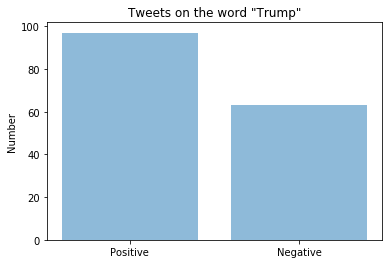

In [232]:
plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Tweets on the word "Trump"')

plt.show()

There are more positive tweets for Trump than Negative

## Data Science Tweets

In [96]:
args_1 = ['data science']
ds_tweets=[]

In [99]:
query = args_1[0]
if len(args_1) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent',geocode="22.1568,89.4332,500km").items(89195):
        ds_tweets.append(status.text)

In [100]:
len(ds_tweets)

78

In [101]:
ds_tweets[0]

u'Python Data Science Cheat Sheets\n\nNothing takes the place of meaningful and substantive study, but these cheat shee\u2026 https://t.co/RGk7nGQnlA'

In [102]:
ds_tweets[1]

u'6th international Data Science Summit supported by department of information technology &amp; electronics, govt. of West Bengal..'

In [103]:
ds_tweets[-1]

u'Improving data science ethics - lessons from the UK government https://t.co/kjmHDoGXXp'

In [104]:
pos=0
neg=0

In [105]:
for tweet in ds_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    if sent[0] == 1:
        pos += 1
    else:
        neg += 1

In [106]:
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

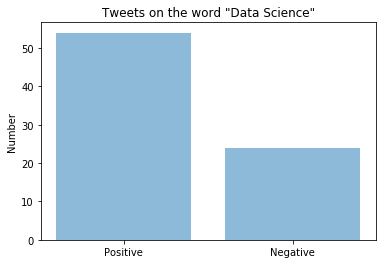

In [234]:
plt.bar(y_pos,[pos,neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Tweets on the word "Data Science"')

plt.show()

Here too there are more positive tweets for data science than Negative.

## Tweets with the word "BOMB"

In [216]:
args_2 = ['bomb']
nk_tweets=[]

In [217]:
query = args_2[0]
if len(args_2) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent',geocode="22.1568,89.4332,500km").items(195):
        nk_tweets.append(status.text)

In [218]:
len(nk_tweets)

195

In [219]:
nk_tweets[0]

u'@Aviator_Floyd @lainejordan So Jordan you still using N bomb \U0001f914'

In [220]:
nk_tweets[1]

u'OK BUT WHO THREW THE PULSE BOMB ON THE BUBBLED D VA https://t.co/MNOzkgxaoA'

In [221]:
nk_tweets[-1]

u'New post (How to Download BOMB SQUAD ON PC | TUTORIAL #VeryEz - Free Download) has been published on Software Free\u2026 https://t.co/F21wpQXD7Z'

In [222]:
positive=0
negative=0

In [223]:
for tweet in nk_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    if sent[0] == 1:
        positive += 1
    else:
        negative += 1

In [224]:
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

In [225]:
positive

81

In [226]:
negative

114

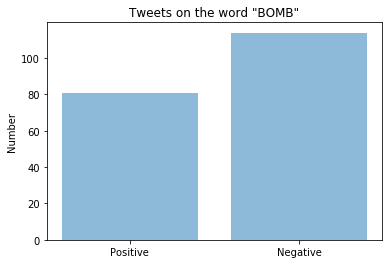

In [229]:
plt.bar(y_pos,[positive,negative],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Tweets on the word "BOMB"')

plt.show()

People have generally negative sentiment towards bombs as seen by the graph above